In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

IMPORTING THE LIBRARIES, LOADING THE DATA

In [ ]:
df = pd.read_csv('social_media_vs_productivity (2).csv')
print("Data loaded successfully. First 5 rows:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nDataFrame Info:")
print(df.info())

Data loaded successfully. First 5 rows:
| age   | gender   | job_type   | daily_social_media_time   | social_platform_preference   | number_of_notifications   | work_hours_per_day   | perceived_productivity_score   | actual_productivity_score   | stress_level   | sleep_hours   | screen_time_before_sleep   | breaks_during_work   | uses_focus_apps   | has_digital_wellbeing_enabled   | coffee_consumption_per_day   | days_feeling_burnout_per_month   | weekly_offline_hours   | job_satisfaction_score   |
|:------|:---------|:-----------|:--------------------------|:-----------------------------|:--------------------------|:---------------------|:-------------------------------|:----------------------------|:---------------|:--------------|:---------------------------|:---------------------|:------------------|:--------------------------------|:-----------------------------|:---------------------------------|:-----------------------|:-------------------------|
| 56    | Male     | Unemployed 

DATA CLEANING

In [ ]:
# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Missing values before cleaning:
|                                | 0    |
|:-------------------------------|:-----|
| age                            | 0    |
| gender                         | 0    |
| job_type                       | 0    |
| daily_social_media_time        | 2765 |
| social_platform_preference     | 0    |
| number_of_notifications        | 0    |
| work_hours_per_day             | 0    |
| perceived_productivity_score   | 1614 |
| actual_productivity_score      | 2365 |
| stress_level                   | 1904 |
| sleep_hours                    | 2598 |
| screen_time_before_sleep       | 2211 |
| breaks_during_work             | 0    |
| uses_focus_apps                | 0    |
| has_digital_wellbeing_enabled  | 0    |
| coffee_consumption_per_day     | 0    |
| days_feeling_burnout_per_month | 0    |
| weekly_offline_hours           | 0    |
| job_satisfaction_score         | 2730 |


In [ ]:
# Impute missing numerical values with the median
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Missing values in '{col}' imputed with median: {median_val}")

Missing values in 'daily_social_media_time' imputed with median: 3.025912770735911
Missing values in 'perceived_productivity_score' imputed with median: 5.525005063662228
Missing values in 'actual_productivity_score' imputed with median: 4.951741600417723
Missing values in 'stress_level' imputed with median: 6.0
Missing values in 'sleep_hours' imputed with median: 6.4983398982218095
Missing values in 'screen_time_before_sleep' imputed with median: 1.0061586763775965
Missing values in 'job_satisfaction_score' imputed with median: 4.951049035003638


<ipython-input-7-4316ce98c009>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [ ]:
# Impute missing categorical values with the mode (if any)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Missing values in '{col}' imputed with mode: {mode_val}")

In [ ]:

# Impute missing categorical values with the mode (if any)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Missing values in '{col}' imputed with mode: {mode_val}")

In [ ]:
# Check for duplicates
print(f"\nNumber of duplicate rows before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

# Verify cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0

Missing values after cleaning:
|                                | 0   |
|:-------------------------------|:----|
| age                            | 0   |
| gender                         | 0   |
| job_type                       | 0   |
| daily_social_media_time        | 0   |
| social_platform_preference     | 0   |
| number_of_notifications        | 0   |
| work_hours_per_day             | 0   |
| perceived_productivity_score   | 0   |
| actual_productivity_score      | 0   |
| stress_level                   | 0   |
| sleep_hours                    | 0   |
| screen_time_before_sleep       | 0   |
| breaks_during_work             | 0   |
| uses_focus_apps                | 0   |
| has_digital_wellbeing_enabled  | 0   |
| coffee_consumption_per_day     | 0   |
| days_feeling_burnout_per_month | 0   |
| weekly_offline_hours           | 0   |
| job_satisfaction_score         | 0   |


EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe().to_markdown(numalign="left", stralign="left"))


Descriptive Statistics for Numerical Columns:
|       | age     | daily_social_media_time   | number_of_notifications   | work_hours_per_day   | perceived_productivity_score   | actual_productivity_score   | stress_level   | sleep_hours   | screen_time_before_sleep   | breaks_during_work   | coffee_consumption_per_day   | days_feeling_burnout_per_month   | weekly_offline_hours   | job_satisfaction_score   |
|:------|:--------|:--------------------------|:--------------------------|:---------------------|:-------------------------------|:----------------------------|:---------------|:--------------|:---------------------------|:---------------------|:-----------------------------|:---------------------------------|:-----------------------|:-------------------------|
| count | 30000   | 30000                     | 30000                     | 30000                | 30000                          | 30000                       | 30000          | 30000         | 30000                      |

In [ ]:
print("\nValue Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().to_markdown(numalign="left", stralign="left"))


Value Counts for Categorical Columns:

Column: gender
| gender   | count   |
|:---------|:--------|
| Male     | 14452   |
| Female   | 14370   |
| Other    | 1178    |

Column: job_type
| job_type   | count   |
|:-----------|:--------|
| Education  | 5055    |
| IT         | 5026    |
| Finance    | 5017    |
| Student    | 5012    |
| Unemployed | 4958    |
| Health     | 4932    |

Column: social_platform_preference
| social_platform_preference   | count   |
|:-----------------------------|:--------|
| TikTok                       | 6096    |
| Telegram                     | 6013    |
| Instagram                    | 6006    |
| Twitter                      | 5964    |
| Facebook                     | 5921    |


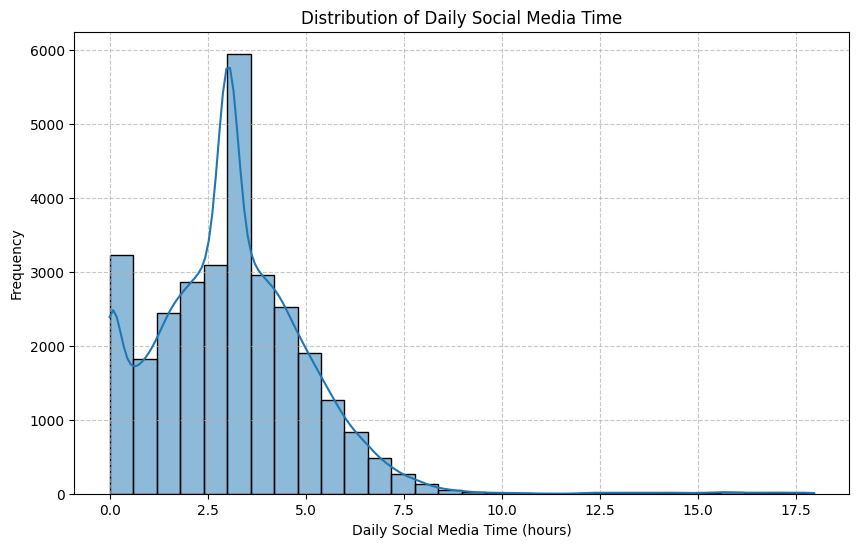

In [ ]:
# Distribution of 'daily_social_media_time'
plt.figure(figsize=(10, 6))
sns.histplot(df['daily_social_media_time'], kde=True, bins=30)
plt.title('Distribution of Daily Social Media Time')
plt.xlabel('Daily Social Media Time (hours)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

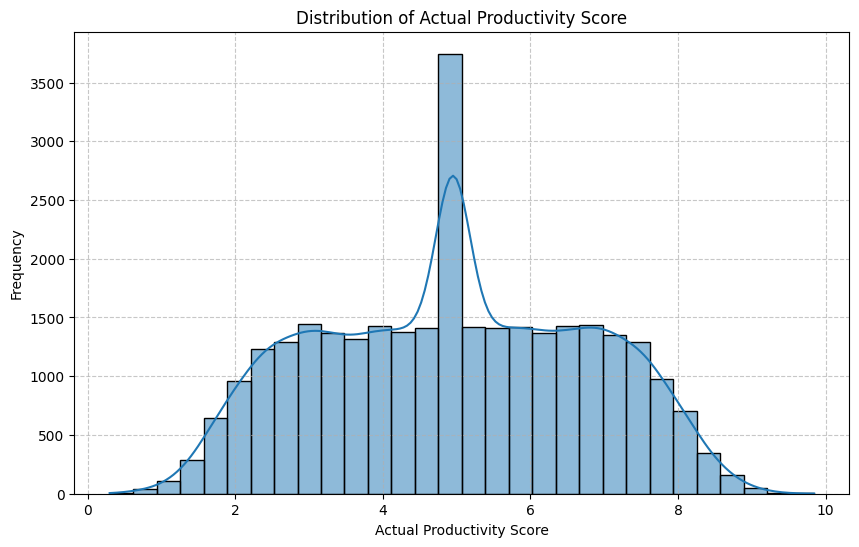

In [ ]:
# Distribution of 'actual_productivity_score'
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_productivity_score'], kde=True, bins=30)
plt.title('Distribution of Actual Productivity Score')
plt.xlabel('Actual Productivity Score')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<ipython-input-15-56161a42dcf3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='social_platform_preference', data=df, order=df['social_platform_preference'].value_counts().index, palette='viridis')


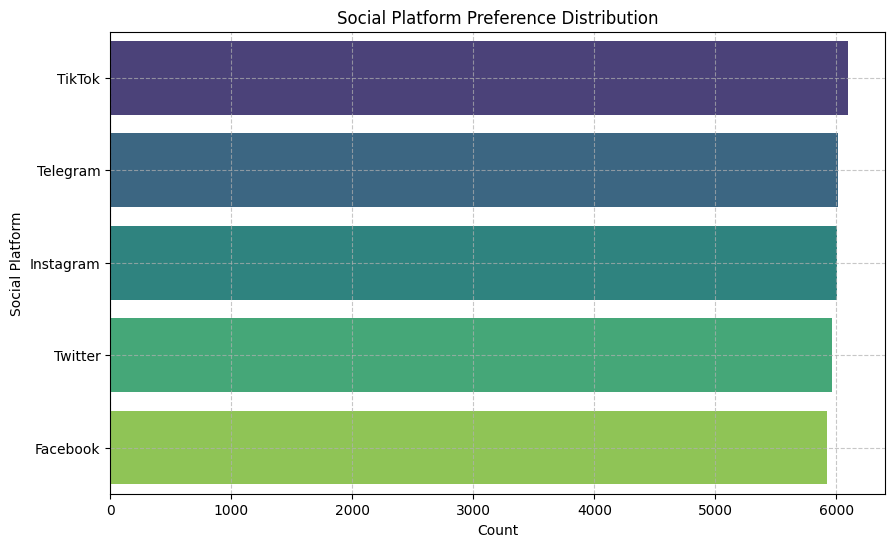

In [ ]:
# Social Platform Preference Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='social_platform_preference', data=df, order=df['social_platform_preference'].value_counts().index, palette='viridis')
plt.title('Social Platform Preference Distribution')
plt.xlabel('Count')
plt.ylabel('Social Platform')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<ipython-input-17-4a1b045ef3b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_type', data=df, order=df['job_type'].value_counts().head(10).index, palette='crest')


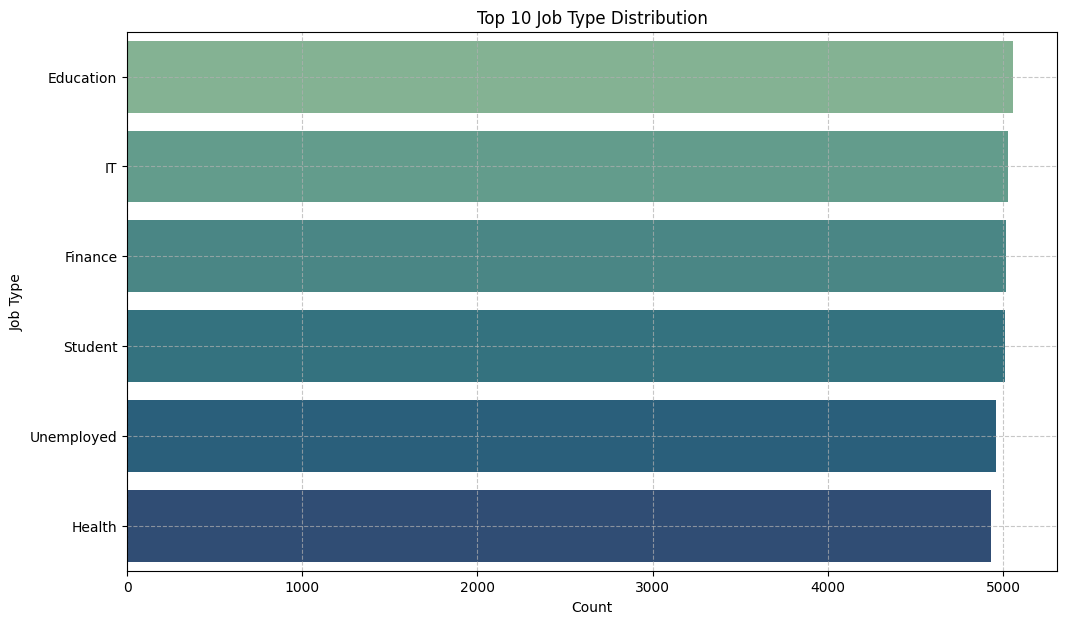

In [ ]:
# Job Type Distribution (Top 10)
plt.figure(figsize=(12, 7))
sns.countplot(y='job_type', data=df, order=df['job_type'].value_counts().head(10).index, palette='crest')
plt.title('Top 10 Job Type Distribution')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

CORRELATION BETWEEN FEATURES

In [ ]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=np.number)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

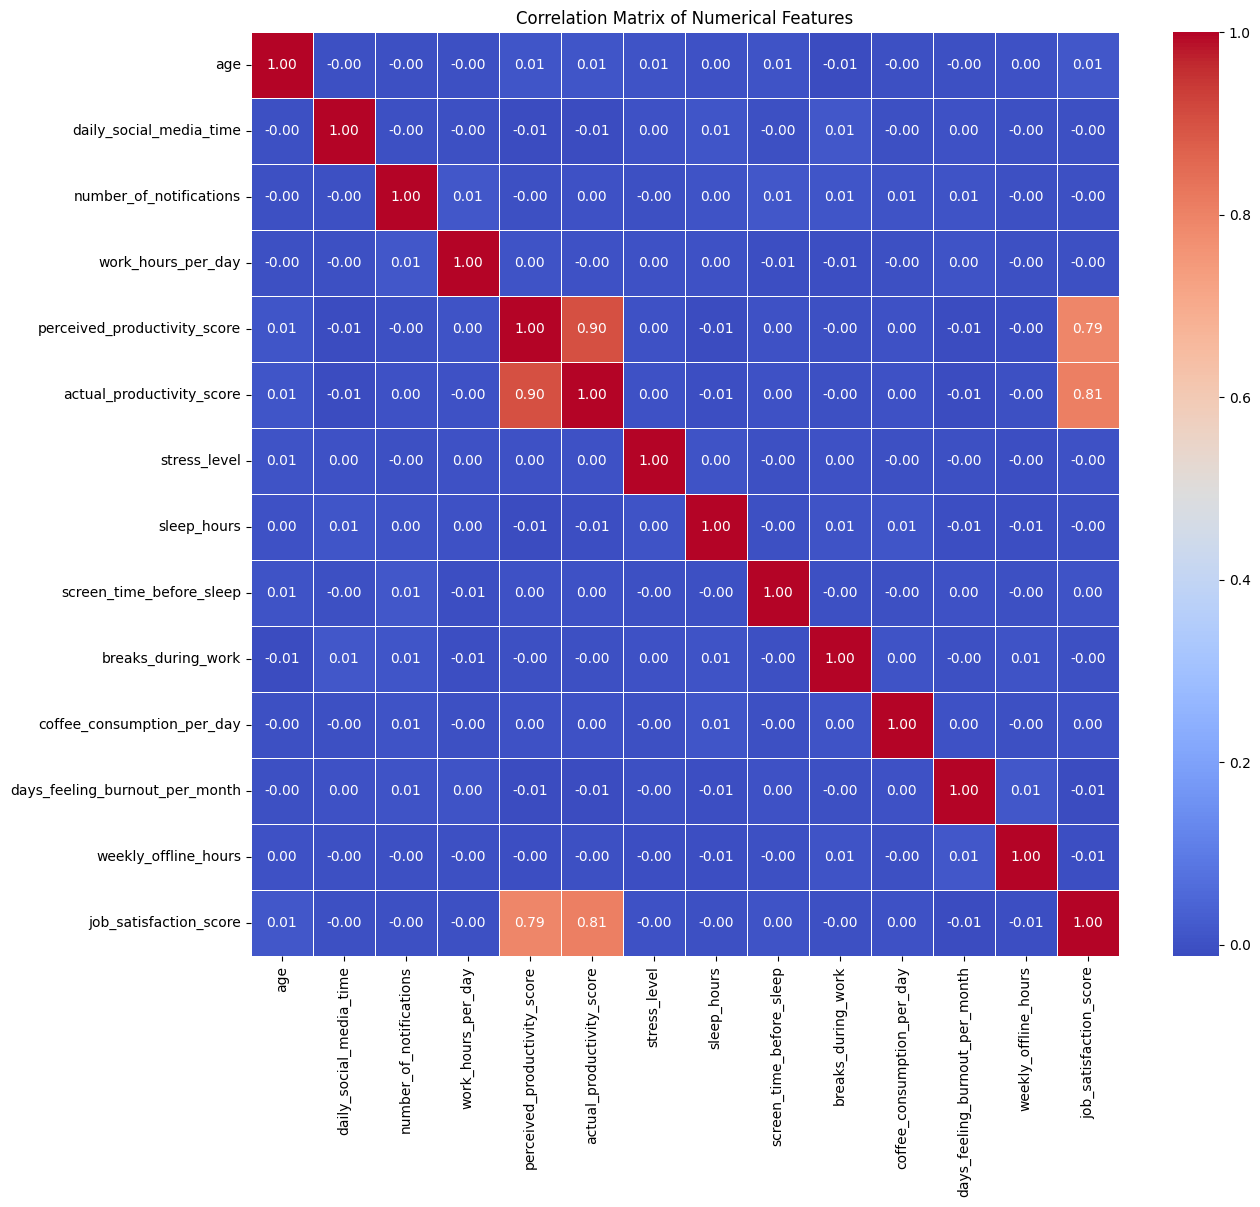

In [ ]:
# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


MACHINE LEARNING PART

In [ ]:
# Define features (X) and target (y)
# Target: actual_productivity_score (regression problem)
X = df.drop('actual_productivity_score', axis=1)
y = df['actual_productivity_score']

In [ ]:
# Handle categorical variables: One-Hot Encoding for 'object' type, Label Encoding for 'bool' type
# Identify boolean columns
boolean_cols = X.select_dtypes(include='bool').columns

In [ ]:
# Convert boolean to int
for col in boolean_cols:
    X[col] = X[col].astype(int)

# Identify remaining categorical columns for One-Hot Encoding
categorical_features_for_ohe = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_features_for_ohe, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (24000, 26)
Shape of X_test: (6000, 26)
Shape of y_train: (24000,)
Shape of y_test: (6000,)


In [ ]:
# Train a RandomForestRegressor model
print("\nTraining RandomForestRegressor model...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")


Training RandomForestRegressor model...
Model training complete.


In [ ]:

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Model Evaluation:
Mean Squared Error (MSE): 0.5018
Root Mean Squared Error (RMSE): 0.7084
R-squared (R2): 0.8451


FEATURE IMPORTANCE


Top 10 Feature Importances:
|                                | 0          |
|:-------------------------------|:-----------|
| perceived_productivity_score   | 0.829352   |
| job_satisfaction_score         | 0.0565607  |
| sleep_hours                    | 0.0122704  |
| work_hours_per_day             | 0.0121069  |
| weekly_offline_hours           | 0.0111043  |
| daily_social_media_time        | 0.0107997  |
| screen_time_before_sleep       | 0.0107549  |
| age                            | 0.00956163 |
| number_of_notifications        | 0.00904674 |
| days_feeling_burnout_per_month | 0.00849205 |


<ipython-input-28-8bafa8b42eb6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.head(20).values, y=feature_importances.head(20).index, palette='mako')


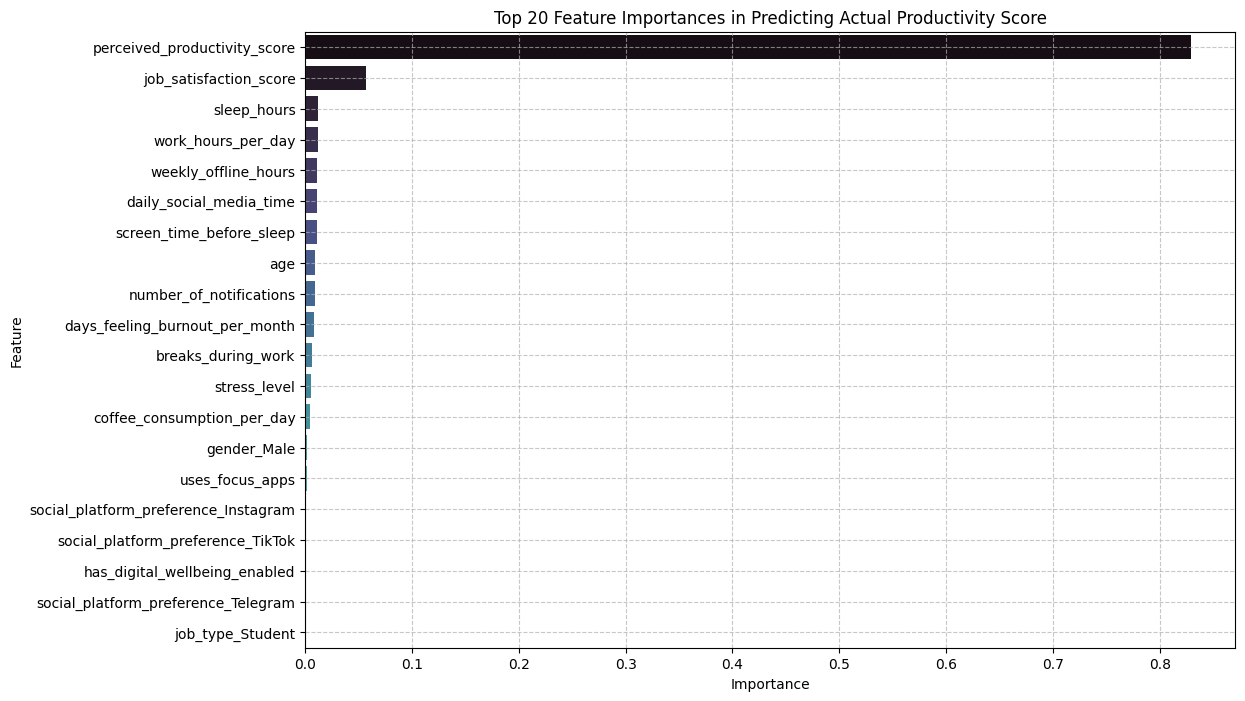

In [ ]:
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    feature_importances = feature_importances.sort_values(ascending=False)

    print("\nTop 10 Feature Importances:")
    print(feature_importances.head(10).to_markdown(numalign="left", stralign="left"))

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances.head(20).values, y=feature_importances.head(20).index, palette='mako')
    plt.title('Top 20 Feature Importances in Predicting Actual Productivity Score')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The trained model does not have 'feature_importances_' attribute.")